régression linéaire simple numpy

In [12]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

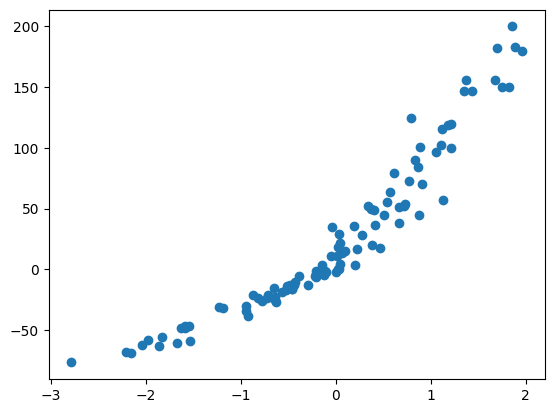

In [13]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y =y + abs(y/2)
plt.scatter(x, y)

In [14]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [15]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X

array([[ 6.75215204e-01, -8.21714795e-01,  1.00000000e+00],
       [ 4.21464838e-02, -2.05296088e-01,  1.00000000e+00],
       [ 4.82163558e-02, -2.19582230e-01,  1.00000000e+00],
       [ 1.64043096e-01,  4.05022340e-01,  1.00000000e+00],
       [ 2.85599317e-03, -5.34414930e-02,  1.00000000e+00],
       [ 2.67178833e+00, -1.63456059e+00,  1.00000000e+00],
       [ 4.32373332e-03,  6.57551011e-02,  1.00000000e+00],
       [ 3.25109110e-01,  5.70183400e-01,  1.00000000e+00],
       [ 8.35739136e-01,  9.14187692e-01,  1.00000000e+00],
       [ 2.05640101e+00,  1.43401569e+00,  1.00000000e+00],
       [ 2.08549194e-01, -4.56671867e-01,  1.00000000e+00],
       [ 1.46417334e+00,  1.21003031e+00,  1.00000000e+00],
       [ 2.50542227e+00, -1.58285257e+00,  1.00000000e+00],
       [ 2.97272907e-01,  5.45227390e-01,  1.00000000e+00],
       [ 1.30804397e-06,  1.14369750e-03,  1.00000000e+00],
       [ 1.39136717e-03,  3.73010344e-02,  1.00000000e+00],
       [ 5.95395116e-01, -7.71618504e-01

In [16]:
theta = np.random.randn(3, 1)
theta

array([[-0.04062282],
       [-1.38450875],
       [-1.11639223]])

In [17]:
def model(X, theta):
    return X.dot(theta)

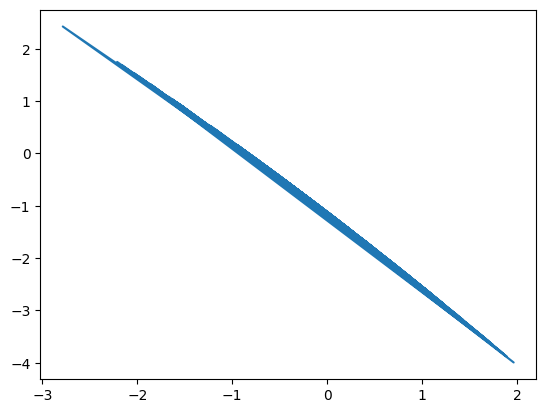

In [18]:
plt.plot(x, model(X, theta))

In [19]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m) * np.sum((model(X, theta) - y) ** 2))

In [20]:
cost_function(X, y, theta)

np.float64(2624.9769181978563)

In [21]:
def grad(X, y , theta):
    m = len(y)
    return (1/m) * X.T.dot(model(X, theta) - y)

In [22]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [23]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [24]:
theta_final

array([[13.48880348],
       [64.15324718],
       [13.01322098]])

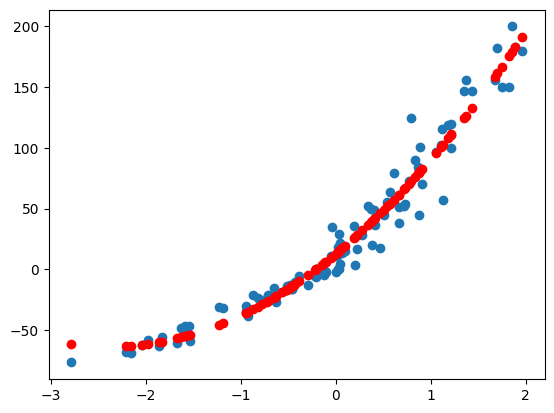

In [29]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, color='r')

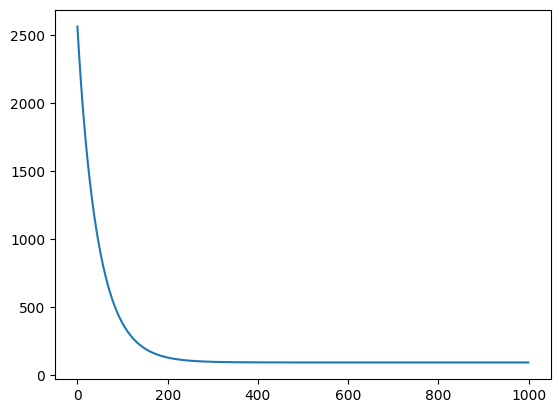

In [30]:
plt.plot(range(1000), cost_history)

In [27]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u/v

In [31]:
coef_determination(y, predictions)

np.float64(0.9580245966859511)